# **Aula 01: Limpeza de Dados**

In [52]:
# Importações
import pandas as pd
import numpy as np

# Leitura e concatenação dos arquivos
arquivos = ['turmas-2023.1.csv', 'turmas-2023.2.csv', 'turmas-2024-1.csv', 'turmas-2024-2.csv']
lista_dfs = [pd.read_csv(arquivo, sep=';', on_bad_lines='skip') for arquivo in arquivos]
df = pd.concat(lista_dfs, ignore_index=True)

# ***Visão Geral dos Dados***

In [53]:
# Exibe as 5 primeiras linhas da tabela
print("Visualização da tabela\n")
print(display(df.head()))

# Exibe as colunas
print(df.columns)

# Inspeção inicial
print("Informações da tabela\n")
print(df.info())

# Informações estatísticas do dataset
display(df.describe())

Visualização da tabela



,id_turma,codigo_turma,siape,matricula_docente_externo,observacao,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,...,capacidade_aluno,tipo,distancia,data_consolidacao,agrupadora,id_turma_agrupadora,qtd_aulas_lancadas,situacao_turma,convenio,modalidade_participantes
0,57711864,01,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,...,1.0,REGULAR,False,2023/07/21 10:59:04.285000000,False,NaN,0.0,CONSOLIDADA,NaN,Presencial
1,57711865,02,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala 03,...,1.0,REGULAR,False,2023/07/21 10:53:20.671000000,False,NaN,13.0,CONSOLIDADA,NaN,Presencial
2,57711866,03,1174208.0,NaN,NaN,69258,15,TÉCNICO,NaN,Sala E,...,1.0,REGULAR,False,2023/07/21 10:57:36.425000000,False,NaN,11.0,CONSOLIDADA,NaN,Presencial
3,57711867,01,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,...,1.0,REGULAR,False,2023/07/10 09:14:34.285000000,False,NaN,18.0,CONSOLIDADA,NaN,Presencial
4,57711868,02,1812476.0,NaN,NaN,69289,15,TÉCNICO,NaN,Sala 13,...,1.0,REGULAR,False,2023/07/10 09:13:43.535000000,False,NaN,18.0,CONSOLIDADA,NaN,Presencial


None
Index(['id_turma', 'codigo_turma', 'siape', 'matricula_docente_externo',
       'observacao', 'id_componente_curricular', 'ch_dedicada_periodo',
       'nivel_ensino', 'campus_turma', 'local', 'ano', 'periodo',
       'data_inicio', 'data_fim', 'descricao_horario', 'total_solicitacoes',
       'capacidade_aluno', 'tipo', 'distancia', 'data_consolidacao',
       'agrupadora', 'id_turma_agrupadora', 'qtd_aulas_lancadas',
       'situacao_turma', 'convenio', 'modalidade_participantes'],
      dtype='object')
Informações da tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60116 entries, 0 to 60115
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_turma                   60116 non-null  int64  
 1   codigo_turma               60116 non-null  object 
 2   siape                      58785 non-null  float64
 3   matricula_docente_externo  1330 non-null   float64
 4   observacao 

,id_turma,siape,matricula_docente_externo,id_componente_curricular,ch_dedicada_periodo,ano,periodo,total_solicitacoes,capacidade_aluno,id_turma_agrupadora,qtd_aulas_lancadas,convenio
count,6.011600e+04,5.878500e+04,1330.000000,6.011600e+04,60116.000000,60116.000000,60116.000000,54283.000000,59890.000000,2.376000e+03,56680.000000,0.0
mean,5.773111e+07,2.221637e+06,50359.935338,1.705349e+05,29.507718,2023.497139,1.495226,17.822246,24.342712,5.772954e+07,91.466937,NaN
std,1.112257e+04,1.137572e+06,34927.064703,4.539591e+05,23.990604,0.499996,0.499981,22.652397,28.594672,1.149284e+04,94.803789,NaN
min,5.771186e+07,1.274600e+04,310.000000,1.865100e+04,0.000000,2023.000000,1.000000,0.000000,1.000000,5.771221e+07,0.000000,NaN
25%,5.772183e+07,1.326629e+06,7815.250000,5.685100e+04,10.000000,2023.000000,1.000000,4.000000,6.000000,5.771781e+07,36.000000,NaN
50%,5.773117e+07,2.075402e+06,72071.000000,6.334000e+04,24.000000,2023.000000,1.000000,9.000000,17.000000,5.772861e+07,68.000000,NaN
75%,5.774106e+07,3.050287e+06,81986.000000,7.159300e+04,60.000000,2024.000000,2.000000,26.000000,40.000000,5.773832e+07,80.000000,NaN
max,5.776030e+07,9.350807e+06,83636.000000,2.056212e+06,270.000000,2024.000000,2.000000,663.000000,827.000000,5.775810e+07,436.000000,NaN


In [54]:
# Variáveis categóricas
for value in list(df.columns):
  if (len(df[value].unique())) <= 10:
    print(f"COLUNA {value}")
    print(df[value].value_counts())
    print("\n")

COLUNA nivel_ensino
nivel_ensino
GRADUAÇÃO                48122
STRICTO SENSU             7742
TÉCNICO                   3042
LATO SENSU                 888
FORMAÇÃO COMPLEMENTAR      322
Name: count, dtype: int64


COLUNA campus_turma
campus_turma
Campus Central          38703
Campus Caicó             4550
Campus Santa Cruz        2902
Campus Macaíba            664
Campus Currais Novos      630
Name: count, dtype: int64


COLUNA ano
ano
2023    30230
2024    29886
Name: count, dtype: int64


COLUNA periodo
periodo
1    30345
2    29771
Name: count, dtype: int64


COLUNA tipo
tipo
REGULAR                         59309
ENSINO INDIVIDUAL                 806
REPOSIÇÃO NO PERÍODO REGULAR        1
Name: count, dtype: int64


COLUNA distancia
distancia
False    59081
True      1035
Name: count, dtype: int64


COLUNA agrupadora
agrupadora
False    60116
Name: count, dtype: int64


COLUNA situacao_turma
situacao_turma
CONSOLIDADA     56954
EXCLUÍDA         2508
ABERTA            584
INTERROMPI

# ***Limpeza de Dados***

In [55]:
# Apagar a coluna de convênio que está vazia
df = df.drop(columns=['convenio'])

In [56]:
# Se 'siape' NÃO for nulo, usa o valor de 'siape', caso contrário usa o valor de 'matricula_docente_externo
df['id_docente'] = np.where(df['siape'].notnull(), df['siape'], df['matricula_docente_externo'])

# Cria 'docente_interno' coluna: True se 'siape' for usada em 'id_docente', False senão
df['docente_interno'] = df['siape'].notnull()

# Apaga as colunas 'siape' e 'matricula_docente_externo
df = df.drop(columns=['siape', 'matricula_docente_externo'])

In [57]:
# É uma boa prática separar a coluna de observaçõa em outra planilha aparte, já que ela ocorre em poucas turmas
obs_df = df[df["observacao"].notnull()][["id_turma","codigo_turma","id_docente","docente_interno", "observacao"]]

# Dropa a coluna 'observacao'
df = df.drop(columns=["observacao"])

# Mostra o formato do dataframe obs_df
print(obs_df.shape)

# Cria um CSV da obs_df.t
obs_df.to_csv("observacoes_turmas.csv", index=False)

(1727, 5)


In [58]:
df.info()

# Existe um docente faltante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60116 entries, 0 to 60115
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_turma                  60116 non-null  int64  
 1   codigo_turma              60116 non-null  object 
 2   id_componente_curricular  60116 non-null  int64  
 3   ch_dedicada_periodo       60116 non-null  int64  
 4   nivel_ensino              60116 non-null  object 
 5   campus_turma              47449 non-null  object 
 6   local                     59773 non-null  object 
 7   ano                       60116 non-null  int64  
 8   periodo                   60116 non-null  int64  
 9   data_inicio               60116 non-null  object 
 10  data_fim                  60116 non-null  object 
 11  descricao_horario         58402 non-null  object 
 12  total_solicitacoes        54283 non-null  float64
 13  capacidade_aluno          59890 non-null  float64
 14  tipo  

In [59]:
display(df[df["id_docente"].isnull()])
print(df["id_docente"].max())

,id_turma,codigo_turma,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,...,tipo,distancia,data_consolidacao,agrupadora,id_turma_agrupadora,qtd_aulas_lancadas,situacao_turma,modalidade_participantes,id_docente,docente_interno
59813,57750420,01,59275,20,STRICTO SENSU,NaN,SALA 71,2024,2,2024/10/01 00:00:00.000,...,REGULAR,False,2025/01/09 15:39:18.989000000,False,NaN,0.0,CONSOLIDADA,Presencial,NaN,False


9350807.0


In [60]:
# Aqui preenchemos o valor faltante
df["id_docente"] = df["id_docente"].fillna(9350808)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60116 entries, 0 to 60115
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_turma                  60116 non-null  int64  
 1   codigo_turma              60116 non-null  object 
 2   id_componente_curricular  60116 non-null  int64  
 3   ch_dedicada_periodo       60116 non-null  int64  
 4   nivel_ensino              60116 non-null  object 
 5   campus_turma              47449 non-null  object 
 6   local                     59773 non-null  object 
 7   ano                       60116 non-null  int64  
 8   periodo                   60116 non-null  int64  
 9   data_inicio               60116 non-null  object 
 10  data_fim                  60116 non-null  object 
 11  descricao_horario         58402 non-null  object 
 12  total_solicitacoes        54283 non-null  float64
 13  capacidade_aluno          59890 non-null  float64
 14  tipo  

In [62]:
df = df.drop(columns=["id_turma_agrupadora"])

In [63]:
df["campus_turma"] = df["campus_turma"].fillna("Não Definido")

In [64]:
print(df["local"].unique())
df["local"] = df["local"].fillna("Não Definido")

['Sala 03' 'Sala E' 'Sala 13' ... 'IMD- Virtual'
 'Sala Prof. Pedro Germano e Turma Virtual do SIGAA' 'Larissa Amorim']


In [65]:
df["descricao_horario"] = df["descricao_horario"].fillna("Não Definido")

In [66]:
df["total_solicitacoes"] = df["total_solicitacoes"].fillna(0)
df["total_solicitacoes"] = df["total_solicitacoes"].astype(int)

In [67]:
df["capacidade_aluno"] = df["capacidade_aluno"].fillna(0)
df["capacidade_aluno"] = df["capacidade_aluno"].astype(int)

In [68]:
df["data_consolidacao"] = df["data_consolidacao"].fillna("Não Consolidada")

In [69]:
df["qtd_aulas_lancadas"] = df["qtd_aulas_lancadas"].fillna(0).astype(int)

In [70]:
df["id_docente"] = df["id_docente"].astype(int).astype(str)
df["id_turma"] = df["id_turma"].astype(int).astype(str)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60116 entries, 0 to 60115
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_turma                  60116 non-null  object
 1   codigo_turma              60116 non-null  object
 2   id_componente_curricular  60116 non-null  int64 
 3   ch_dedicada_periodo       60116 non-null  int64 
 4   nivel_ensino              60116 non-null  object
 5   campus_turma              60116 non-null  object
 6   local                     60116 non-null  object
 7   ano                       60116 non-null  int64 
 8   periodo                   60116 non-null  int64 
 9   data_inicio               60116 non-null  object
 10  data_fim                  60116 non-null  object
 11  descricao_horario         60116 non-null  object
 12  total_solicitacoes        60116 non-null  int64 
 13  capacidade_aluno          60116 non-null  int64 
 14  tipo                  

In [72]:
# Verifica se todos os valores são False na coluna "agrupadora"
if (df['agrupadora'] == False).all():
    print("Todos os valores são False.")
else:
    print("Há valores True ou outros na coluna.")

# Dropando a coluna
df.drop(columns=["agrupadora"], inplace=True)

Todos os valores são False.


In [73]:
# Converte texto para data
df['data_inicio'] = pd.to_datetime(df['data_inicio'])
df['data_fim'] = pd.to_datetime(df['data_fim'])

# Verificar mudança de data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60116 entries, 0 to 60115
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_turma                  60116 non-null  object        
 1   codigo_turma              60116 non-null  object        
 2   id_componente_curricular  60116 non-null  int64         
 3   ch_dedicada_periodo       60116 non-null  int64         
 4   nivel_ensino              60116 non-null  object        
 5   campus_turma              60116 non-null  object        
 6   local                     60116 non-null  object        
 7   ano                       60116 non-null  int64         
 8   periodo                   60116 non-null  int64         
 9   data_inicio               60116 non-null  datetime64[ns]
 10  data_fim                  60116 non-null  datetime64[ns]
 11  descricao_horario         60116 non-null  object        
 12  total_solicitacoes

In [74]:
# Padronizações com .lower() e .strip()
df['nivel_ensino'] = df['nivel_ensino'].str.lower().str.strip()
df['campus_turma'] = df['campus_turma'].str.lower().str.strip()
df['situacao_turma'] = df['situacao_turma'].str.lower().str.strip()
df['modalidade_participantes'] = df['modalidade_participantes'].str.lower().str.strip()

# Verificação de mudança de padronização
display(df["nivel_ensino"])
display(df["nivel_ensino"])
display(df["situacao_turma"])
display(df["modalidade_participantes"])

,nivel_ensino
0,técnico
1,técnico
2,técnico
3,técnico
4,técnico
...,...
60111,stricto sensu
60112,técnico
60113,lato sensu
60114,lato sensu


,nivel_ensino
0,técnico
1,técnico
2,técnico
3,técnico
4,técnico
...,...
60111,stricto sensu
60112,técnico
60113,lato sensu
60114,lato sensu


,situacao_turma
0,consolidada
1,consolidada
2,consolidada
3,consolidada
4,consolidada
...,...
60111,excluída
60112,consolidada
60113,aberta
60114,aberta


,modalidade_participantes
0,presencial
1,presencial
2,presencial
3,presencial
4,presencial
...,...
60111,presencial
60112,presencial
60113,presencial
60114,presencial


In [75]:
# Verificando as colunas ainda existentes
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60116 entries, 0 to 60115
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_turma                  60116 non-null  object        
 1   codigo_turma              60116 non-null  object        
 2   id_componente_curricular  60116 non-null  int64         
 3   ch_dedicada_periodo       60116 non-null  int64         
 4   nivel_ensino              60116 non-null  object        
 5   campus_turma              60116 non-null  object        
 6   local                     60116 non-null  object        
 7   ano                       60116 non-null  int64         
 8   periodo                   60116 non-null  int64         
 9   data_inicio               60116 non-null  datetime64[ns]
 10  data_fim                  60116 non-null  datetime64[ns]
 11  descricao_horario         60116 non-null  object        
 12  total_solicitacoes

,id_turma,codigo_turma,id_componente_curricular,ch_dedicada_periodo,nivel_ensino,campus_turma,local,ano,periodo,data_inicio,...,total_solicitacoes,capacidade_aluno,tipo,distancia,data_consolidacao,qtd_aulas_lancadas,situacao_turma,modalidade_participantes,id_docente,docente_interno
0,57711864,01,69258,15,técnico,não definido,Sala 03,2023,1,2023-02-27,...,0,1,REGULAR,False,2023/07/21 10:59:04.285000000,0,consolidada,presencial,1174208,True
1,57711865,02,69258,15,técnico,não definido,Sala 03,2023,1,2023-02-27,...,0,1,REGULAR,False,2023/07/21 10:53:20.671000000,13,consolidada,presencial,1174208,True
2,57711866,03,69258,15,técnico,não definido,Sala E,2023,1,2023-02-27,...,0,1,REGULAR,False,2023/07/21 10:57:36.425000000,11,consolidada,presencial,1174208,True
3,57711867,01,69289,15,técnico,não definido,Sala 13,2023,1,2023-02-27,...,0,1,REGULAR,False,2023/07/10 09:14:34.285000000,18,consolidada,presencial,1812476,True
4,57711868,02,69289,15,técnico,não definido,Sala 13,2023,1,2023-02-27,...,0,1,REGULAR,False,2023/07/10 09:13:43.535000000,18,consolidada,presencial,1812476,True


# **Aula 02: Análise Exploratória de Dados**

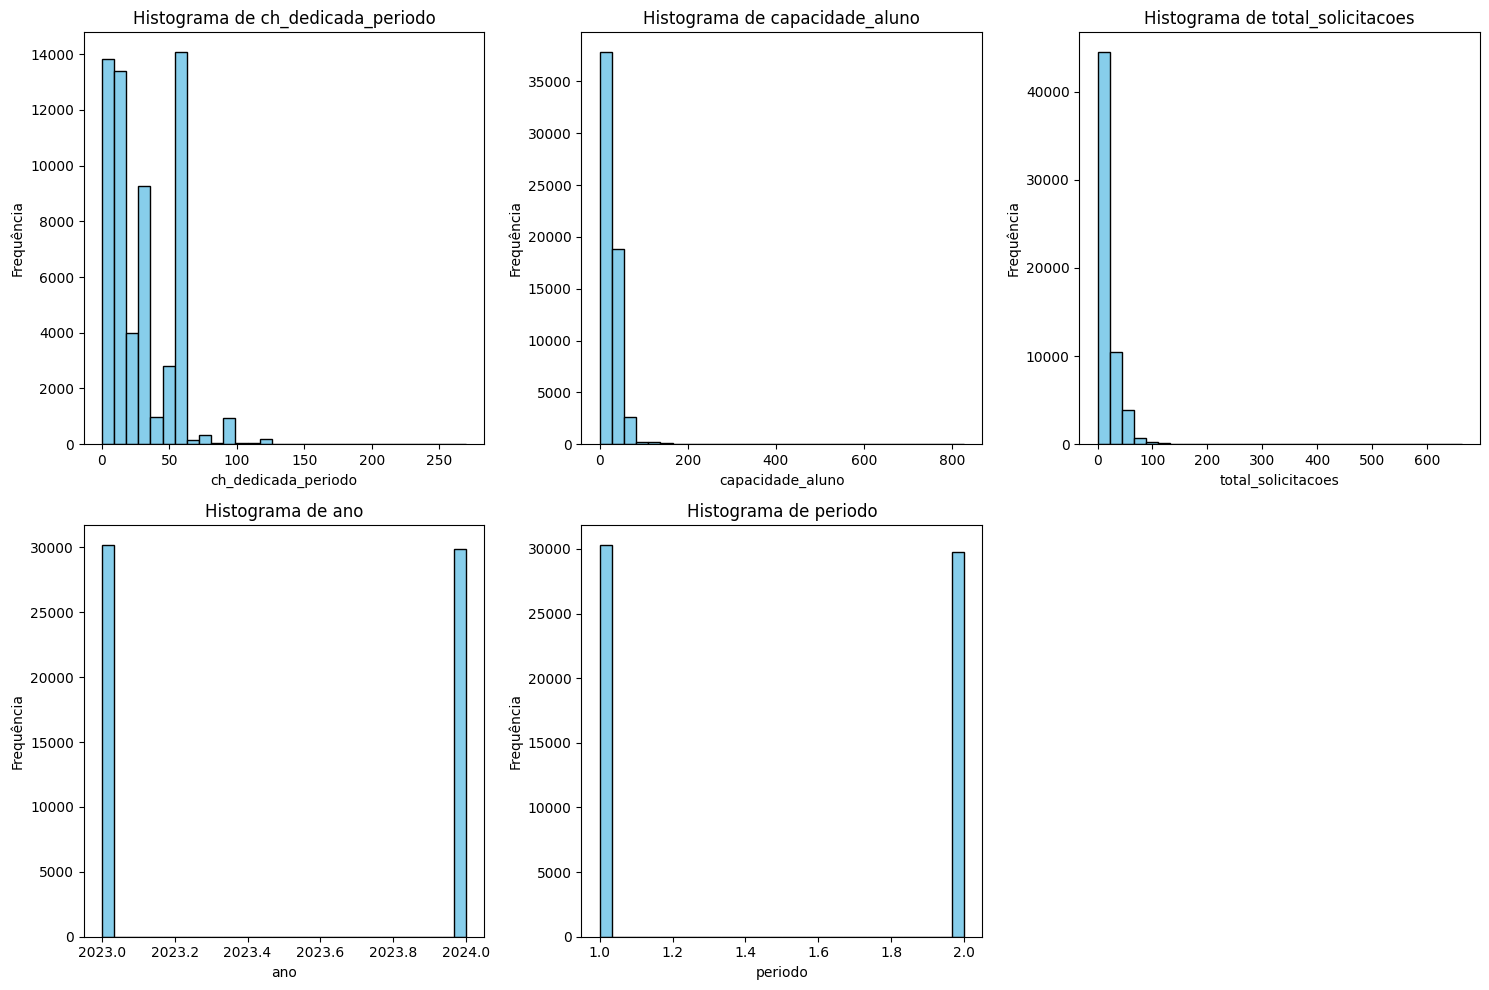

In [76]:
import matplotlib.pyplot as plt

# Configuração para melhor visibilidade
plt.figure(figsize=(15, 10))

# Lista de colunas numéricas
num_cols = ['ch_dedicada_periodo', 'capacidade_aluno', 'total_solicitacoes', 'ano', 'periodo']

# Plotagem
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

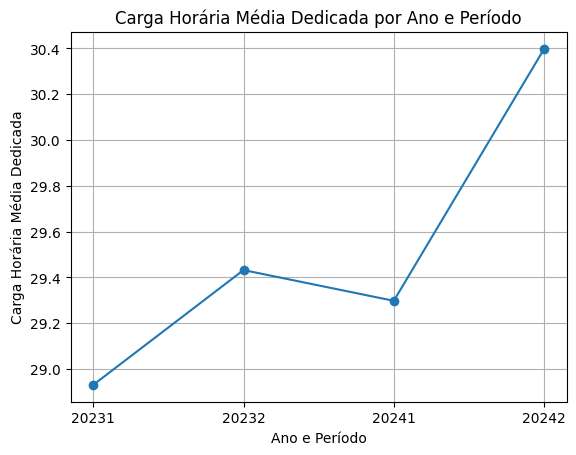

In [77]:
# Agrupar por ano e período e calcular a média da carga horária dedicada
carga_horaria_por_periodo = df.groupby(['ano', 'periodo'])['ch_dedicada_periodo'].mean().reset_index()

# Combinar ano e período para o eixo x
carga_horaria_por_periodo['ano_periodo'] = carga_horaria_por_periodo['ano'].astype(str) + carga_horaria_por_periodo['periodo'].astype(str)

# Plotar o gráfico de linha
plt.plot(carga_horaria_por_periodo['ano_periodo'], carga_horaria_por_periodo['ch_dedicada_periodo'], marker='o')
plt.title("Carga Horária Média Dedicada por Ano e Período")
plt.xlabel("Ano e Período")
plt.ylabel("Carga Horária Média Dedicada")
plt.grid(True)
plt.show()


Análise da coluna: nivel_ensino
Tabela de Frequência para nivel_ensino:


,nivel_ensino,Frequência
0,graduação,48122
1,stricto sensu,7742
2,técnico,3042
3,lato sensu,888
4,formação complementar,322


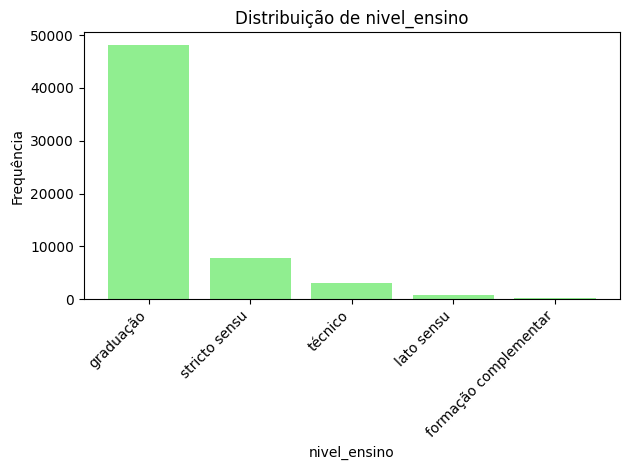


Análise da coluna: campus_turma
Tabela de Frequência para campus_turma:


,campus_turma,Frequência
0,campus central,38703
1,não definido,12667
2,campus caicó,4550
3,campus santa cruz,2902
4,campus macaíba,664
5,campus currais novos,630


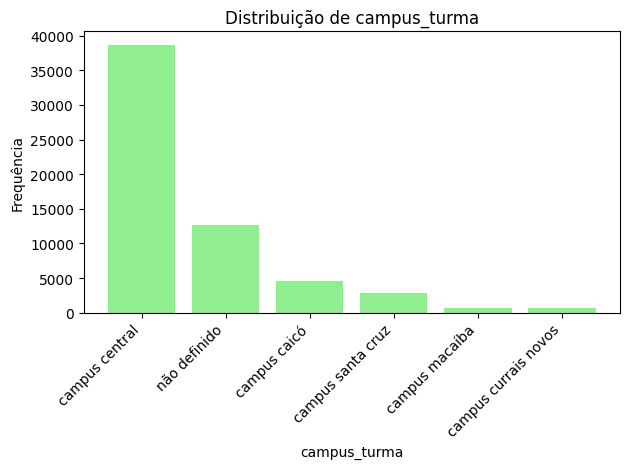


Análise da coluna: tipo
Tabela de Frequência para tipo:


,tipo,Frequência
0,REGULAR,59309
1,ENSINO INDIVIDUAL,806
2,REPOSIÇÃO NO PERÍODO REGULAR,1


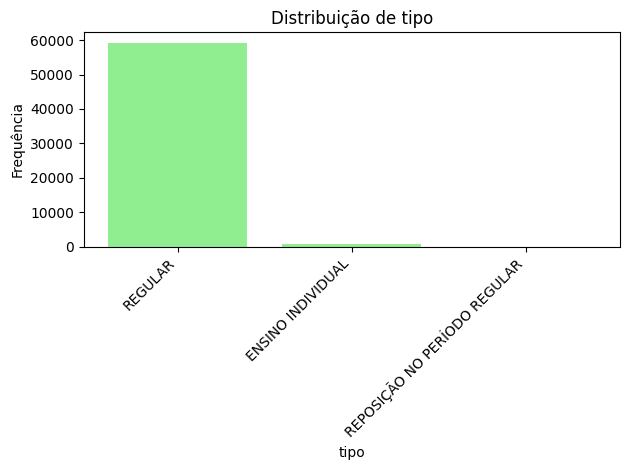


Análise da coluna: distancia
Tabela de Frequência para distancia:


,distancia,Frequência
0,False,59081
1,True,1035


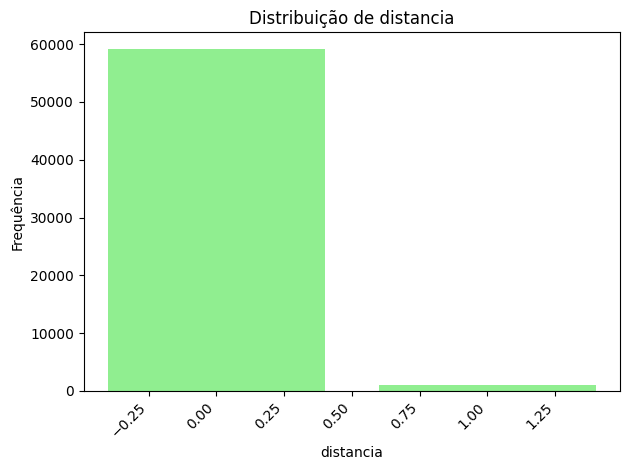

In [78]:
# Lista de colunas categóricas
cat_cols = ['nivel_ensino', 'campus_turma', 'tipo', 'distancia']

for col in cat_cols:
    print(f"\nAnálise da coluna: {col}")

    # Tabela de frequência
    freq_table = df[col].value_counts().reset_index()
    freq_table.columns = [col, 'Frequência']
    print(f"Tabela de Frequência para {col}:")
    display(freq_table)

    # Gráfico de barras
    plt.bar(freq_table[col], freq_table['Frequência'], color='lightgreen')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

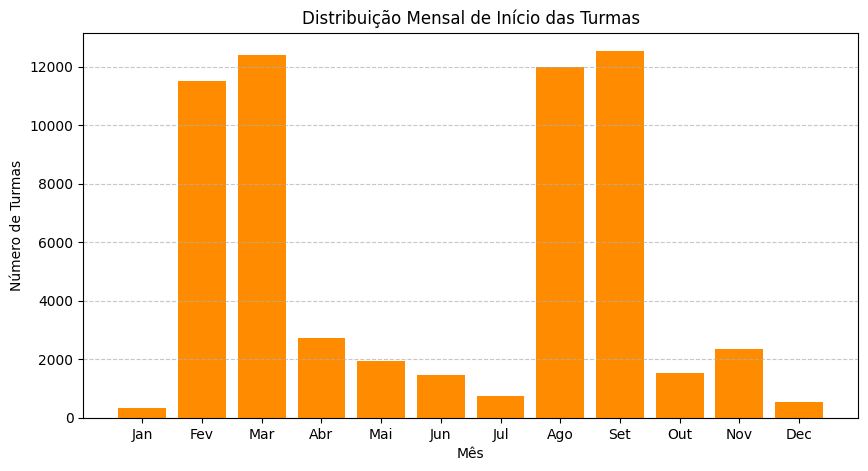

In [80]:
# Extrair mês e ano de início
df['mes_inicio'] = df['data_inicio'].dt.month
df['ano_inicio'] = df['data_inicio'].dt.year

# Contar turmas por mês (agregando todos os anos)
turmas_por_mes = df['mes_inicio'].value_counts().sort_index()

# Gráfico de sazonalidade mensal
plt.figure(figsize=(10, 5))
plt.bar(turmas_por_mes.index, turmas_por_mes.values, color='darkorange')
plt.title('Distribuição Mensal de Início das Turmas')
plt.xlabel('Mês')
plt.ylabel('Número de Turmas')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Aula 03: Data Mining**